# WeatherPy

In [203]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy

# Import API key
from api_keys import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [204]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code

    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))

619
619


In [205]:
#Create df to store the data
weather = pd.DataFrame({
                        'City': cities, 
                        'Cloudiness': "", 
                        'Country': countries, 
                        'Date': "",
                        'Humidity': "", 
                        'Lat': "", 
                        'Lng': "", 
                        'Max Temp': "", 
                        'Windspeed': ""})

weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,sonoita,,MX,,,,,,
1,dakar,,SN,,,,,,
2,new norfolk,,AU,,,,,,
3,mys shmidta,,RU,,,,,,
4,deputatskiy,,RU,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).



In [208]:
#Base url to make the API call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

for index, location in weather.iterrows(): 
    
    #Create the query url for the API call
    query_url = base_url + location['City'] + ',' + location['Country'] + '&APPID=' + api_key
    
    print(index)
    print(query_url)
    
    #API call
    r = requests.get(query_url)
    
    if r.status_code == 200:
        weather.loc[index, 'Cloudiness'] = r.json()['clouds']['all']
        weather.loc[index, 'Date'] = r.json()['dt']
        weather.loc[index, 'Humidity'] = r.json()['main']['humidity']
        weather.loc[index, 'Lat'] = r.json()['coord']['lat']
        weather.loc[index, 'Lng'] = r.json()['coord']['lon']
        weather.loc[index, 'Max Temp'] = r.json()['main']['temp_max']
        weather.loc[index, 'Windspeed'] = r.json()['wind']['speed']



0
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=sonoita,MX&APPID=f1a1215cf8619234c58d4236c797ca65
1
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=dakar,SN&APPID=f1a1215cf8619234c58d4236c797ca65
2
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=new norfolk,AU&APPID=f1a1215cf8619234c58d4236c797ca65
3
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=mys shmidta,RU&APPID=f1a1215cf8619234c58d4236c797ca65
4
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=deputatskiy,RU&APPID=f1a1215cf8619234c58d4236c797ca65
5
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=bluff,NZ&APPID=f1a1215cf8619234c58d4236c797ca65
6
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=aflu,DZ&APPID=f1a1215cf8619234c58d4236c797ca65
7
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=jiddah,SA&APPID=f1a1215cf8619234c58d4236c797ca65
8
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=kr

In [209]:
# drop rows with Nan values
weather['Max Temp'] = weather['Max Temp'].replace('', np.nan)
weather = weather.dropna()

In [210]:
weather.Lat.count()

542

In [211]:
#Save dataframe
weather.to_csv("Output/City_Weather_Data.csv", index=False, header=True)

#Preview the dataframe
weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
1,dakar,0,SN,1577165092,68,14.69,-17.45,69.80,13.87
2,new norfolk,20,AU,1577165092,42,-42.78,147.06,70.00,10.29
4,deputatskiy,92,RU,1577165007,99,69.3,139.9,-32.26,1.21
5,bluff,94,NZ,1577165092,58,-46.6,168.33,60.01,8.01
8,krasnovishersk,100,RU,1577165192,97,60.4,57.08,24.62,3.67


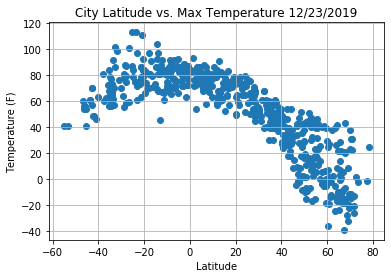

In [214]:
# Build a scatter plot for each data type
plt.scatter(weather["Lat"], weather["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%m/%d/%Y')}")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


dtype('O')